### Preprocessing Flow Data

This notebook processes river flow data by:
- Cleaning and formatting time series;
- Visualising trends and data quality;
- Resampling to hourly intervals;
- Merging with river level data;
- Preparing features for downstream ML models.


In [0]:
#Imports all modules and libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [0]:
# CSV into a new DataFrame which can be replicated for the other datasets.
df = pd.read_csv(os.path.join("Data", "Imported_API_Flow.csv")) 
df

,measure,date,dateTime,value,quality,station
0,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19T00:00:00,14.228,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
1,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19T00:15:00,15.746,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
2,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19T00:30:00,18.130,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
3,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19T00:45:00,21.454,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
4,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19T01:00:00,24.321,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
...,...,...,...,...,...,...
173083,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-03-13,2024-03-13T22:00:00,1.562,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
173084,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-03-13,2024-03-13T22:15:00,1.562,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
173085,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-03-13,2024-03-13T22:30:00,1.562,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
173086,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-03-14,2024-03-14T04:00:00,1.499,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b


In [0]:
#Checking the data types - dateTime needs to be set as a date and time. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173088 entries, 0 to 173087
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   measure   173088 non-null  object 
 1   date      173088 non-null  object 
 2   dateTime  173088 non-null  object 
 3   value     173088 non-null  float64
 4   quality   173088 non-null  object 
 5   station   173088 non-null  object 
dtypes: float64(1), object(5)
memory usage: 7.9+ MB


In [0]:
print(df.head())  # First 5 rows
print(df.tail())  # Last 5 rows


                                             measure  ...                               station
0  {'@id': 'http://environment.data.gov.uk/hydrol...  ...  7998bf73-641d-4084-b00c-ca6989f2ba2b
1  {'@id': 'http://environment.data.gov.uk/hydrol...  ...  7998bf73-641d-4084-b00c-ca6989f2ba2b
2  {'@id': 'http://environment.data.gov.uk/hydrol...  ...  7998bf73-641d-4084-b00c-ca6989f2ba2b
3  {'@id': 'http://environment.data.gov.uk/hydrol...  ...  7998bf73-641d-4084-b00c-ca6989f2ba2b
4  {'@id': 'http://environment.data.gov.uk/hydrol...  ...  7998bf73-641d-4084-b00c-ca6989f2ba2b

[5 rows x 6 columns]
                                                  measure  ...                               station
173083  {'@id': 'http://environment.data.gov.uk/hydrol...  ...  7998bf73-641d-4084-b00c-ca6989f2ba2b
173084  {'@id': 'http://environment.data.gov.uk/hydrol...  ...  7998bf73-641d-4084-b00c-ca6989f2ba2b
173085  {'@id': 'http://environment.data.gov.uk/hydrol...  ...  7998bf73-641d-4084-b00c-ca6989f2ba2

In [0]:
#Change the column 'dateTime' so that is is in datetime format.
df['dateTime'] = pd.to_datetime(df['dateTime'])

In [0]:
#Check that dateTime is now datetime format.
print(df.dtypes)

measure             object
date                object
dateTime    datetime64[ns]
value              float64
quality             object
station             object
dtype: object


In [0]:
#Explore how many stations there are in the dataset.
df.groupby('station')['dateTime'].nunique()


station
7998bf73-641d-4084-b00c-ca6989f2ba2b    173088
Name: dateTime, dtype: int64

In [0]:
#Explore the number of nulls in each column. 
print(df.isna().sum())

measure     0
date        0
dateTime    0
value       0
quality     0
station     0
dtype: int64


In [0]:
#Check the shape of the data.
print(df.shape)

(173088, 6)


In [0]:
print(df.duplicated().sum())


0


In [0]:
#Sort the DataFrame by the 'DateTime' column and reset the index so that it is easier to use for further exploration. 
df = df.sort_values('dateTime').reset_index(drop=True)

## Exploratory Data Analysis
Below I examine the distribution of values and quality flags to evaluate data reliability.

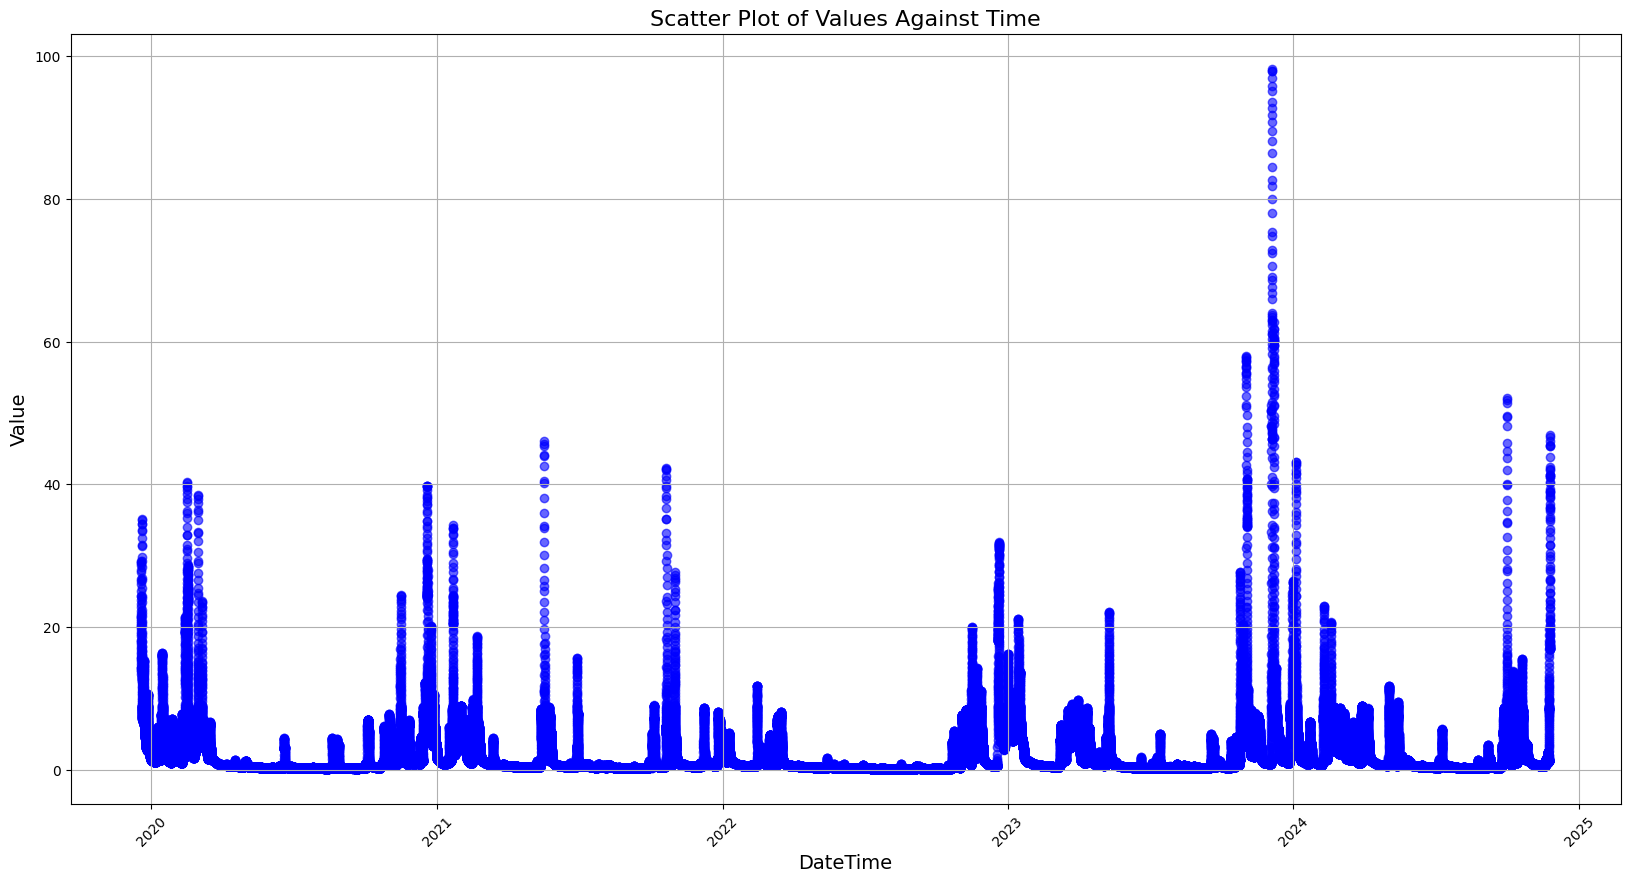

In [0]:
#Create a scatter plot of the values against time. 
plt.figure(figsize=(20, 10))
plt.scatter(df['dateTime'], df['value'], alpha=0.6, color='blue')  
plt.title('Scatter Plot of Values Against Time', fontsize=16)
plt.xlabel('DateTime', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#The scatter plot displays water flow values over time for a single station, highlighting clear seasonal  patterns and an overall increasing trend. Peaks appear at regular intervals, suggesting that flooding events are recurring, likely due to seasonal rainfall. A significant spike in 2024 stands out. The presence of frequent low values indicates periods of stable or minimal water flow. 

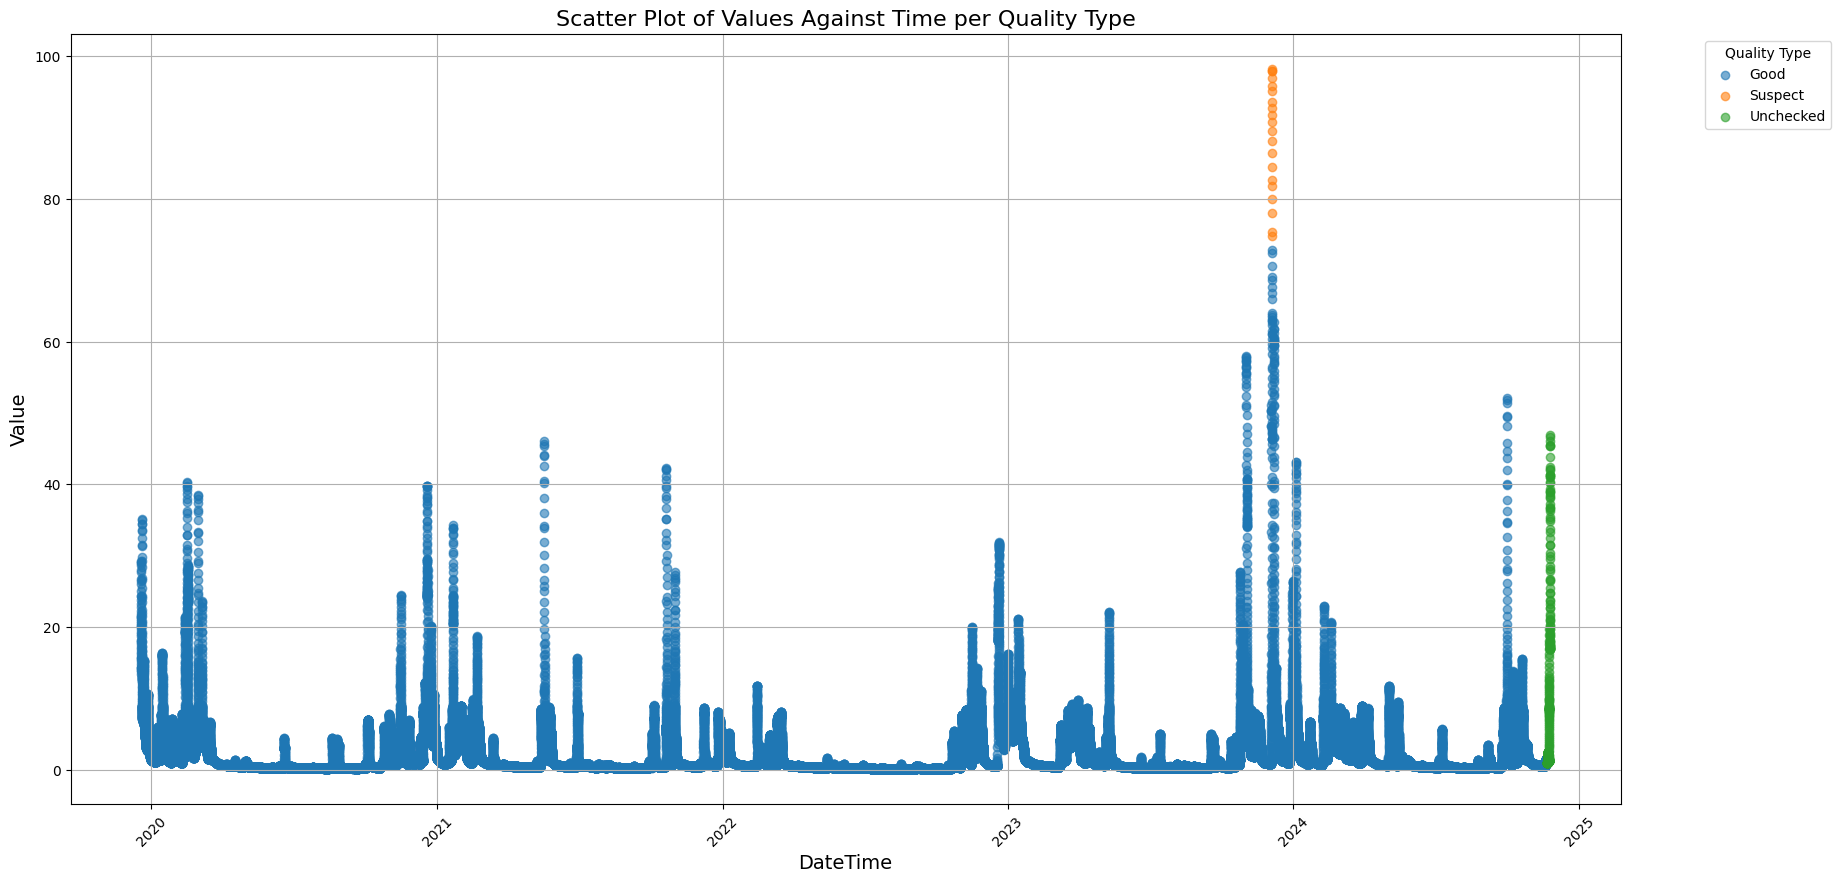

In [0]:
#Demonstrate the same graph but per quality type. 
plt.figure(figsize=(20, 10))

for quality, group in df.groupby('quality'):
    plt.scatter(group['dateTime'], group['value'], alpha=0.6, label=quality)

plt.title('Scatter Plot of Values Against Time per Quality Type', fontsize=16)
plt.xlabel('DateTime', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Quality Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#'Suspect' flow data demonstrates a large number of high outlier value but they may be automatically flagged due to their height and not be unrepresentaive. 

In [0]:
#Locate the date of the highest value which is 'Suspect'.
print(df.loc[df['value'].idxmax()])
#Cross-referencing this with the warnings_df_filled data shows that this marks a flood warning occurence. 


measure     {'@id': 'http://environment.data.gov.uk/hydrol...
date                                               2023-12-04
dateTime                                  2023-12-04 19:00:00
value                                                  98.206
quality                                               Suspect
station                  7998bf73-641d-4084-b00c-ca6989f2ba2b
Name: 138892, dtype: object


In [0]:
df

,measure,date,dateTime,value,quality,station
0,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19 00:00:00,14.228,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
1,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19 00:15:00,15.746,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
2,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19 00:30:00,18.130,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
3,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19 00:45:00,21.454,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
4,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19 01:00:00,24.321,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
...,...,...,...,...,...,...
173083,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,2024-11-24 22:45:00,40.324,Unchecked,7998bf73-641d-4084-b00c-ca6989f2ba2b
173084,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,2024-11-24 23:00:00,38.989,Unchecked,7998bf73-641d-4084-b00c-ca6989f2ba2b
173085,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,2024-11-24 23:15:00,38.513,Unchecked,7998bf73-641d-4084-b00c-ca6989f2ba2b
173086,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,2024-11-24 23:30:00,36.773,Unchecked,7998bf73-641d-4084-b00c-ca6989f2ba2b


In [0]:
#Investigating the 'quality' counts for each station's data. 
df['quality'].value_counts(dropna=False)

Good         172716
Unchecked       352
Suspect          20
Name: quality, dtype: int64

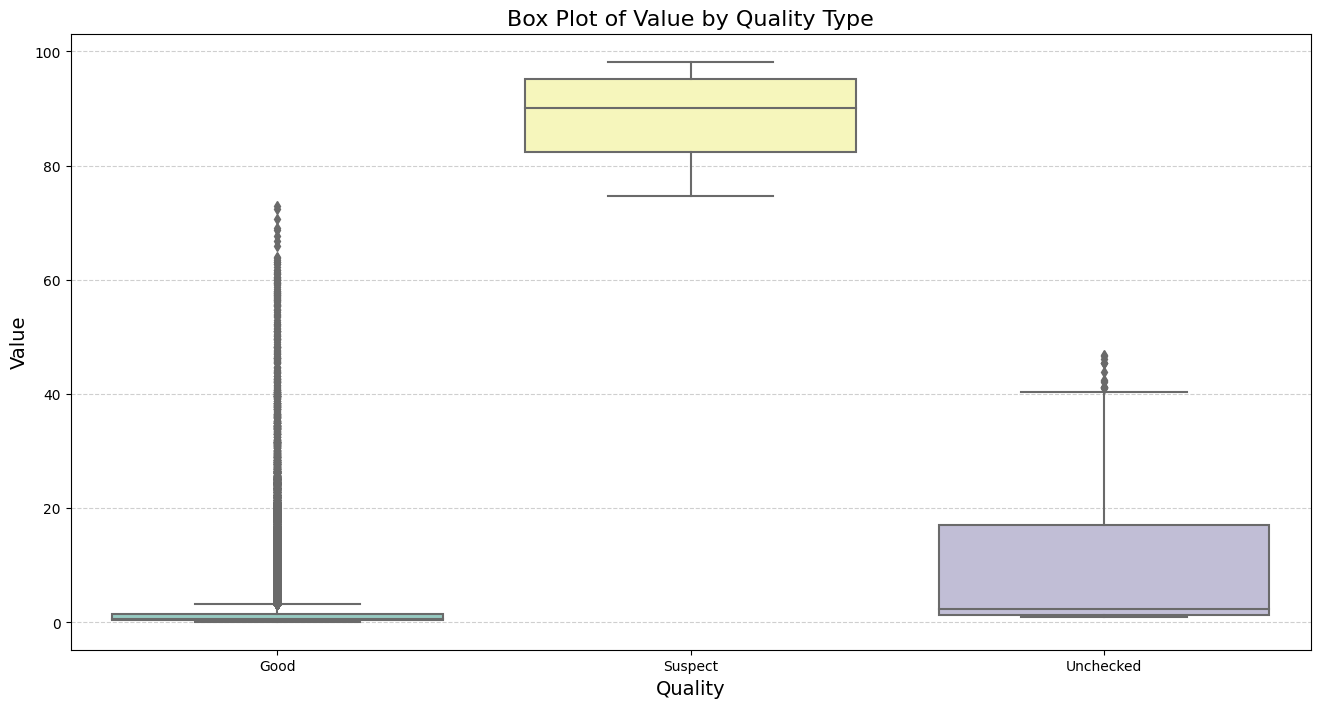

In [0]:
#Create a box plot for each quality type.

plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x='quality', y='value', palette="Set3")
plt.title('Box Plot of Value by Quality Type', fontsize=16)
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#The box plot shows the distribution of water flow values by quality type. "Good" quality data has mostly low values with outliers. "Unchecked" data has a wider spread, with a median higher than "Good" and some values exceeding 40. "Suspect" data stands out with significantly higher values, ranging between 80 and 100.     

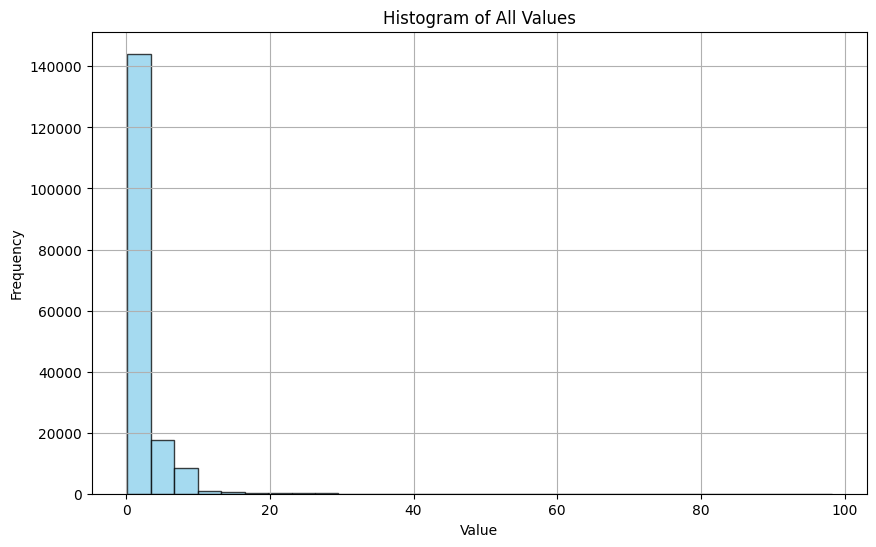

In [0]:
#Create a histogram for all values.
plt.figure(figsize=(10, 6))
plt.hist(df['value'], bins=30, color='skyblue', edgecolor='black', alpha=0.75)
plt.title('Histogram of All Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#The histogram shows the distribution of all water flow values, highlighting a strong right-skewed pattern where most values are concentrated near zero. A very high frequency of low values suggests that normal water flow remains relatively low for most of the time, while higher values are much less common. The presence of a long tail indicates occasional extreme events, such as flooding, with values reaching up to 100. This distribution suggests that while extreme water flows occur, they are rare compared to the dominant lower range.


In [0]:
#Explore the number of nulls in each column. 
print(df.isnull().sum())

measure     0
date        0
dateTime    0
value       0
quality     0
station     0
dtype: int64


In [0]:
#Group by 'quality' and calculate descriptive statistics.
df.groupby('quality')['value'].agg(
    average='mean',
    median='median',
    mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    std_dev='std',
    count='count'
).reset_index()


#"Good" quality data has a low average (1.79) and median (0.64), indicating that most values are relatively small, though the high standard deviation suggests occasional spikes. "Unchecked" data has a higher average (9.82) and median (2.39), showing more variation. "Suspect" data stands out with an extremely high average (88.58) and median (90.15), indicating that these values are significantly larger and potentially erroneous or extreme flooding events. The small count (20) for "Suspect" and the visuals from earlier demonstrating the trend for the 'Suspect' data mean that I will not be removing the datapoints as erroneous or outliers. 

,quality,average,median,mode,std_dev,count
0,Good,1.792065,0.6430,0.293,3.258353,172716
1,Suspect,88.584200,90.1455,97.940,7.760108,20
2,Unchecked,9.832037,2.3665,1.266,12.475789,352


In [0]:
df

,index,measure,date,dateTime,value,quality,station
0,0,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19 00:00:00,14.228,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
1,1,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19 00:15:00,15.746,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
2,2,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19 00:30:00,18.130,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
3,3,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19 00:45:00,21.454,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
4,4,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,2019-12-19 01:00:00,24.321,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
...,...,...,...,...,...,...,...
173083,173083,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,2024-11-24 22:45:00,40.324,Unchecked,7998bf73-641d-4084-b00c-ca6989f2ba2b
173084,173084,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,2024-11-24 23:00:00,38.989,Unchecked,7998bf73-641d-4084-b00c-ca6989f2ba2b
173085,173085,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,2024-11-24 23:15:00,38.513,Unchecked,7998bf73-641d-4084-b00c-ca6989f2ba2b
173086,173086,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,2024-11-24 23:30:00,36.773,Unchecked,7998bf73-641d-4084-b00c-ca6989f2ba2b


In [0]:
#Convert the dateTime column to datetime.
df['dateTime'] = pd.to_datetime(df['dateTime'])

#Resample the data to hourly intervals and keeping the maximum flow value. 
df_hourly = df.resample('H', on='dateTime').max().reset_index()



In [0]:
df_hourly = df_hourly.reset_index()

In [0]:
df_hourly

,level_0,dateTime,index,measure,date,value,quality,station
0,0,2019-12-19 00:00:00,3,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,21.454,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
1,0,2019-12-19 01:00:00,7,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,29.052,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
2,0,2019-12-19 02:00:00,11,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,29.238,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
3,0,2019-12-19 03:00:00,15,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,26.812,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
4,0,2019-12-19 04:00:00,19,{'@id': 'http://environment.data.gov.uk/hydrol...,2019-12-19,23.769,Good,7998bf73-641d-4084-b00c-ca6989f2ba2b
...,...,...,...,...,...,...,...,...
43267,0,2024-11-24 19:00:00,173071,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,33.286,Unchecked,7998bf73-641d-4084-b00c-ca6989f2ba2b
43268,0,2024-11-24 20:00:00,173075,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,38.277,Unchecked,7998bf73-641d-4084-b00c-ca6989f2ba2b
43269,0,2024-11-24 21:00:00,173079,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,41.319,Unchecked,7998bf73-641d-4084-b00c-ca6989f2ba2b
43270,0,2024-11-24 22:00:00,173083,{'@id': 'http://environment.data.gov.uk/hydrol...,2024-11-24,42.080,Unchecked,7998bf73-641d-4084-b00c-ca6989f2ba2b


In [0]:
#Keeping only the required columns. 
df_hourly = df_hourly[['station', 'dateTime', 'value']]
df_hourly

,station,dateTime,value
0,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 00:00:00,21.454
1,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 01:00:00,29.052
2,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 02:00:00,29.238
3,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 03:00:00,26.812
4,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 04:00:00,23.769
...,...,...,...
43267,7998bf73-641d-4084-b00c-ca6989f2ba2b,2024-11-24 19:00:00,33.286
43268,7998bf73-641d-4084-b00c-ca6989f2ba2b,2024-11-24 20:00:00,38.277
43269,7998bf73-641d-4084-b00c-ca6989f2ba2b,2024-11-24 21:00:00,41.319
43270,7998bf73-641d-4084-b00c-ca6989f2ba2b,2024-11-24 22:00:00,42.080


### Feature Engineering
Below we examine the optimal transformations of flow data and how it correlates with level data for downstream machine learning.

In [0]:
level = pd.read_csv("/dbfs/mnt/lab/unrestricted/luke.male@environment-agency.gov.uk/Level_cleaned_hourly.csv")


level

,station,dateTime,value
0,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 00:00:00,2.198
1,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 01:00:00,2.291
2,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 02:00:00,2.293
3,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 03:00:00,2.266
4,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 04:00:00,2.229
...,...,...,...
86539,ce5176cf-1523-4dbe-855f-17a0efffbe02,2024-11-24 19:00:00,2.520
86540,ce5176cf-1523-4dbe-855f-17a0efffbe02,2024-11-24 20:00:00,2.513
86541,ce5176cf-1523-4dbe-855f-17a0efffbe02,2024-11-24 21:00:00,2.503
86542,ce5176cf-1523-4dbe-855f-17a0efffbe02,2024-11-24 22:00:00,2.506


In [0]:
#Rename 'value' to 'level'.
#Rename 'value' to 'flow'.
level.rename(columns={"value": "level"}, inplace=True)
df_hourly.rename(columns={"value": "flow"}, inplace=True)

/root/.ipykernel/46460/command-221711049891662-2627987760:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hourly.rename(columns={"value": "flow"}, inplace=True)


In [0]:
#Ensure 'dateTime' is in datetime format.
df_hourly['dateTime'] = pd.to_datetime(df_hourly['dateTime'])
level['dateTime'] = pd.to_datetime(level['dateTime'])

#Merge on 'dateTime'.
df_merged = df_hourly.merge(level, on='dateTime', how='inner')


/root/.ipykernel/46460/command-221711049891659-3957706901:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hourly['dateTime'] = pd.to_datetime(df_hourly['dateTime'])


In [0]:
df_merged

,station_x,dateTime,flow,station_y,level
0,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 00:00:00,21.454,7998bf73-641d-4084-b00c-ca6989f2ba2b,2.198
1,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 00:00:00,21.454,ce5176cf-1523-4dbe-855f-17a0efffbe02,4.588
2,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 01:00:00,29.052,7998bf73-641d-4084-b00c-ca6989f2ba2b,2.291
3,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 01:00:00,29.052,ce5176cf-1523-4dbe-855f-17a0efffbe02,3.412
4,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 02:00:00,29.238,7998bf73-641d-4084-b00c-ca6989f2ba2b,2.293
...,...,...,...,...,...
86539,7998bf73-641d-4084-b00c-ca6989f2ba2b,2024-11-24 21:00:00,41.319,ce5176cf-1523-4dbe-855f-17a0efffbe02,2.503
86540,7998bf73-641d-4084-b00c-ca6989f2ba2b,2024-11-24 22:00:00,42.080,7998bf73-641d-4084-b00c-ca6989f2ba2b,2.410
86541,7998bf73-641d-4084-b00c-ca6989f2ba2b,2024-11-24 22:00:00,42.080,ce5176cf-1523-4dbe-855f-17a0efffbe02,2.506
86542,7998bf73-641d-4084-b00c-ca6989f2ba2b,2024-11-24 23:00:00,38.989,7998bf73-641d-4084-b00c-ca6989f2ba2b,2.385


In [0]:
#Only keep the station data which has been identified as useful to the model. 
df_merged = df_merged[df_merged['station_y'] != 'ce5176cf-1523-4dbe-855f-17a0efffbe02']
df_merged

,station_x,dateTime,flow,station_y,level
0,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 00:00:00,21.454,7998bf73-641d-4084-b00c-ca6989f2ba2b,2.198
2,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 01:00:00,29.052,7998bf73-641d-4084-b00c-ca6989f2ba2b,2.291
4,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 02:00:00,29.238,7998bf73-641d-4084-b00c-ca6989f2ba2b,2.293
6,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 03:00:00,26.812,7998bf73-641d-4084-b00c-ca6989f2ba2b,2.266
8,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 04:00:00,23.769,7998bf73-641d-4084-b00c-ca6989f2ba2b,2.229
...,...,...,...,...,...
86534,7998bf73-641d-4084-b00c-ca6989f2ba2b,2024-11-24 19:00:00,33.286,7998bf73-641d-4084-b00c-ca6989f2ba2b,2.334
86536,7998bf73-641d-4084-b00c-ca6989f2ba2b,2024-11-24 20:00:00,38.277,7998bf73-641d-4084-b00c-ca6989f2ba2b,2.379
86538,7998bf73-641d-4084-b00c-ca6989f2ba2b,2024-11-24 21:00:00,41.319,7998bf73-641d-4084-b00c-ca6989f2ba2b,2.404
86540,7998bf73-641d-4084-b00c-ca6989f2ba2b,2024-11-24 22:00:00,42.080,7998bf73-641d-4084-b00c-ca6989f2ba2b,2.410


In [0]:
#Drop uneeded columns. 
df_merged = df_merged.drop(columns=['station_x', 'station_y'])
df_merged


,dateTime,flow,level
0,2019-12-19 00:00:00,21.454,2.198
2,2019-12-19 01:00:00,29.052,2.291
4,2019-12-19 02:00:00,29.238,2.293
6,2019-12-19 03:00:00,26.812,2.266
8,2019-12-19 04:00:00,23.769,2.229
...,...,...,...
86534,2024-11-24 19:00:00,33.286,2.334
86536,2024-11-24 20:00:00,38.277,2.379
86538,2024-11-24 21:00:00,41.319,2.404
86540,2024-11-24 22:00:00,42.080,2.410


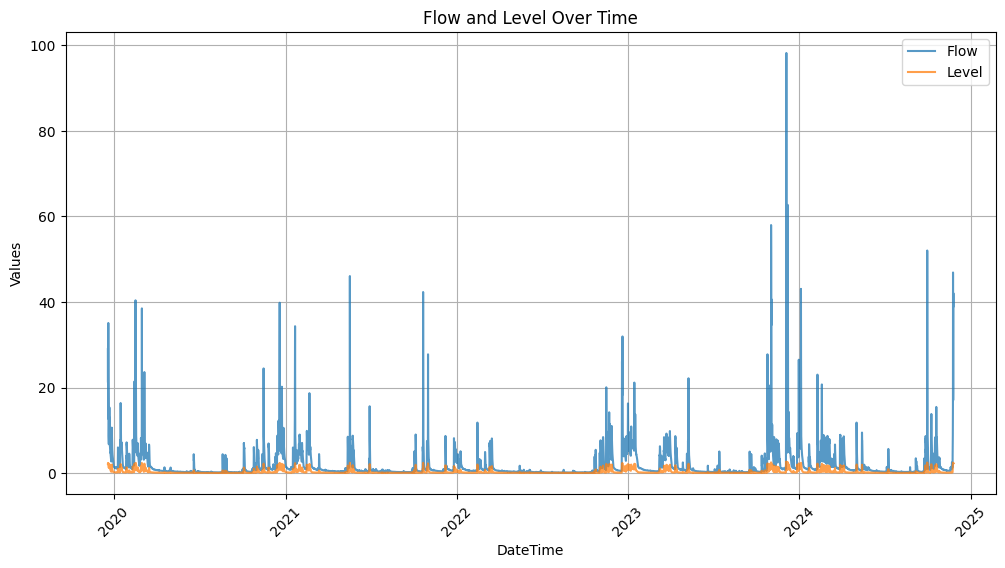

In [0]:
#Ensure dateTime is sorted.
df_merged = df_merged.sort_values(by='dateTime')

#Create the plot.
plt.figure(figsize=(12, 6))
plt.plot(df_merged['dateTime'], df_merged['flow'], label='Flow', alpha=0.75)
plt.plot(df_merged['dateTime'], df_merged['level'], label='Level', alpha=0.75)
plt.xlabel('DateTime')
plt.ylabel('Values')
plt.title('Flow and Level Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


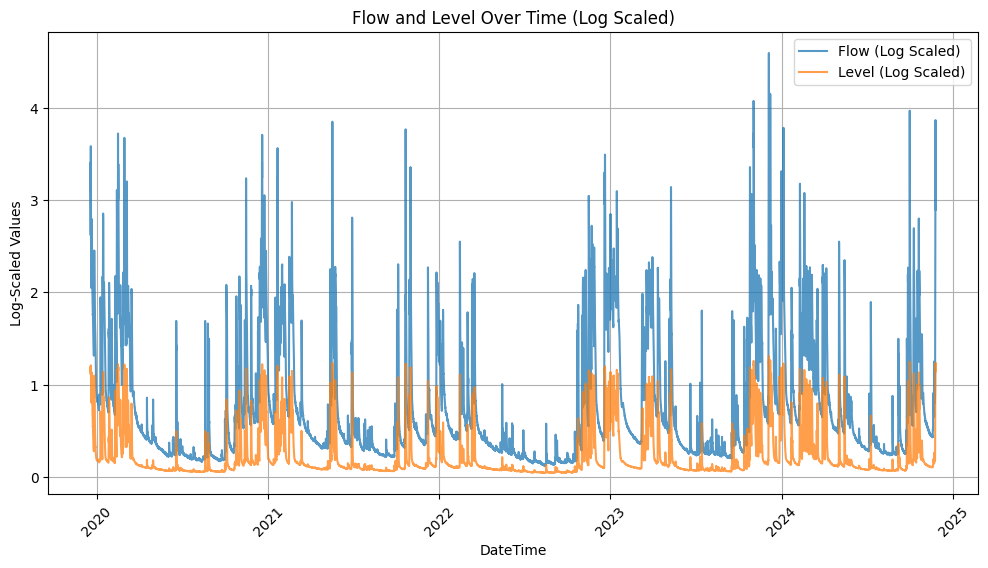

In [0]:
# Apply log scaling to allow easier visual interpretation. 
df_merged['flow_scaled'] = np.log1p(df_merged['flow'])
df_merged['level_scaled'] = np.log1p(df_merged['level'])

# Create the visual.
plt.figure(figsize=(12, 6))
plt.plot(df_merged['dateTime'], df_merged['flow_scaled'], label='Flow (Log Scaled)', alpha=0.75)
plt.plot(df_merged['dateTime'], df_merged['level_scaled'], label='Level (Log Scaled)', alpha=0.75)
plt.xlabel('DateTime')
plt.ylabel('Log-Scaled Values')
plt.title('Flow and Level Over Time (Log Scaled)')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

#The visual shows a correlation between level and flow, which is expected. 


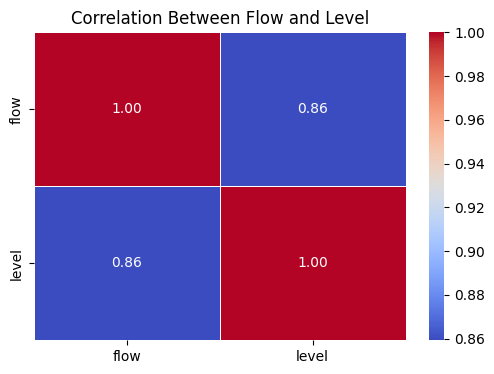

In [0]:
#Computing correlation between flow and level data.
correlation = df_merged[['flow', 'level']].corr()

#Display correlation heatmap.
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Flow and Level")
plt.show()

#This shows a high correlation between flow and level. Features for flow will be engineered in a similar way to water flow in the ML model. 

In [0]:
#Save as CSV.
os.makedirs("Data", exist_ok=True)
df_hourly.to_csv(os.path.join(output_dir, "Flow_Cleaned_Hourly.csv"), index=False)
print(f"CSV saved to {os.path.abspath(output_path)}")

CSV saved to /Workspace/Users/luke.male@environment-agency.gov.uk/Reduced Scope Flooding Work/*** ML Flood Prediction/API Imports and Data/Flood Warning Predictor/Data/Flow_Cleaned_Hourly.csv
